<a href="https://colab.research.google.com/github/ammarhaiderak/stocks-indicators/blob/main/ConnorsRSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install required packages
! pip install pandas
! pip install yfinance
! pip install pandas_ta
! pip install matplotlib
! pip install numpy

In [ ]:
def streak(df):
    siz = df['Close'].shape[0]
    # df['streak'] = 0
    for i in range(1, siz):
      if df.loc[i-1, 'streak'] >= 0:
          if df.loc[i, 'Close'] > df.loc[i-1, 'Close']: # continuing positive streak
            df.loc[i, 'streak'] = df.loc[i-1, 'streak'] + 1
          elif df.loc[i, 'Close'] < df.loc[i-1, 'Close']:  # starting a new negative streak
            df.loc[i, 'streak'] = -1
          else:
            df.loc[i, 'streak'] = 0
      elif df.loc[i-1, 'streak'] <= 0:
          if df.loc[i, 'Close'] > df.loc[i-1, 'Close']: # starting a new positive streak
            df.loc[i, 'streak'] = 1
          elif df.loc[i, 'Close'] < df.loc[i-1, 'Close']:  # continuing neg streak
            df.loc[i, 'streak'] = df.loc[i-1, 'streak'] - 1
          else:
            df.loc[i, 'streak'] = 0
    return df


# streak(df).head()

In [ ]:
import numpy as np
def get_streaks_rsi(df, length):
  # logic tables
  closing_prices = df['Close']
  series = pd.DataFrame(closing_prices)
  geq = series >= series.shift(1)  # True if rising
  eq = series == series.shift(1)  # True if equal
  logic_table = pd.concat([geq, eq], axis=1)

  streaks = [0]  # holds the streak duration, starts with 0

  for row in logic_table.iloc[1:].itertuples():  # iterate through logic table
      if row[2]:  # same value as before
          streaks.append(0)
          continue
      last_value = streaks[-1]
      if row[1]:  # higher value than before
          streaks.append(last_value + 1 if last_value >= 0 else 1)  # increase or reset to +1
      else:  # lower value than before
          streaks.append(last_value - 1 if last_value < 0 else -1)  # decrease or reset to -1

  df['streaks_numpy'] = np.array(streaks, dtype=float)
  df['second-rsi'] = ta.momentum.rsi(df['streaks_numpy'], length)
  return df
# get_streaks_rsi(df['Close'], 2)

In [ ]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf

df = pd.DataFrame() # Empty DataFrame

# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# 1mo => 5m, 15m, 30m, 1h
# 1d => 1m
# 1y => 1d

df = df.ta.ticker("aapl", period='1y', interval='1d')


df.reset_index(inplace=True)
df['id'] = [x for x in range(df.shape[0])]
df.set_index(df['id'], inplace=True)


df.head()
df['streak'] = 0
# # df.head()
# df.index
# df = streak(df)
df = get_streaks_rsi(df, 2)
df = streak(df)
df['rsi'] = ta.rsi(close=df["Close"], length=14)
df['first-rsi'] = ta.rsi(close=df["Close"], length=3)
df['second-rsi-2'] = ta.rsi(close=df["streak"], length=2)
df['roc'] = ta.roc(close=df["Close"], length=100)

df['crsi'] = (df['first-rsi'] + df['second-rsi'] + df['roc']) / 3

fdf = df.tail(100)


fdf

# get_streaks_rsi(df['Close'], 2)

(251, 7)
[50.98109738207822, 37.18980823132517, 18.24508628957017, 7.5101051168642625, 5.422749919732635, 33.588173210339, 48.69365709320937, 15.981268200616055, 11.028552296081573, 6.54789417900817, 3.0681681798689984, 32.08144411806282, 19.13903446039291, 12.742735678307852, 34.73931933049851, 19.990799303735347, 41.92620900331951, 53.82097186454559, 18.011833072150466, 32.43059266153079, 19.131605757308318, 13.233163463323656, 42.09979029441363, 49.49595500429848, 22.127378720357203, 18.225250281932922, 11.061815858602793, 34.40069209673393, 40.638478647605446, 18.49565705399112, 7.234819258824011, 3.4949341384781873, 36.66576686469576, 47.55135904373049, 50.91518271162884, 24.456025299459153, 11.977393246715886, 29.59283537953664, 18.703765767268983, 14.569060888146815, 48.44872167557231, 23.95960820100362, 43.48587499823169, 49.28541596000424, 51.52413549929332, 25.56991300398563, 45.72429975859819, 52.610479812686975, 58.13005382461924, 26.891697914362833, 14.914079233552348, 48.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,id,streak,streaks_numpy,second-rsi,rsi,first-rsi,second-rsi-2,roc,crsi
id,,,,,,,,,,,,,,,,,
151,2022-08-17 00:00:00-04:00,172.483874,175.858266,172.284209,174.260925,79542000,0.0,0.0,151,1,1.0,60.372378,76.524776,92.008336,60.372378,0.562578,50.981097
152,2022-08-18 00:00:00-04:00,173.462256,174.610345,172.833295,173.861588,62290100,0.0,0.0,152,-1,-1.0,31.282926,75.319164,80.327634,31.282926,-0.041136,37.189808
153,2022-08-19 00:00:00-04:00,172.743440,173.452271,171.026288,171.235947,70346300,0.0,0.0,153,-2,-2.0,21.110955,67.760238,35.668386,21.110955,-2.044081,18.245086
154,2022-08-22 00:00:00-04:00,169.408980,169.578697,166.863200,167.292496,69026800,0.0,0.0,154,-3,-3.0,12.792030,58.297246,15.835000,12.792030,-6.096714,7.510105
155,2022-08-23 00:00:00-04:00,166.803303,168.430609,166.374007,166.953049,54147100,0.0,0.0,155,-4,-4.0,7.153921,57.552179,14.774266,7.153921,-5.659937,5.422750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2023-01-03 00:00:00-05:00,130.279999,130.899994,124.169998,125.070000,112117500,0.0,0.0,246,-1,-1.0,35.550528,32.340122,22.405478,35.550528,-25.976445,10.659854
247,2023-01-04 00:00:00-05:00,126.889999,128.660004,125.080002,126.360001,89113600,0.0,0.0,247,1,1.0,64.019712,34.889563,36.223348,64.019712,-24.880047,25.121005
248,2023-01-05 00:00:00-05:00,127.129997,127.769997,124.760002,125.019997,80962700,0.0,0.0,248,-1,-1.0,33.990527,33.478394,28.355518,33.990527,-27.235686,11.703453


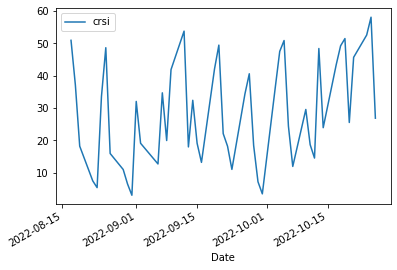

In [ ]:
fdf[:50].plot.line(x='Date', y='crsi')

In [ ]:
print(df.ta.indicators())